In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import butter, lfilter

In [91]:
#Read data from CSV datafile
dataset = pd.read_excel("data.xlsx", usecols=[5,6]) 
array_data = np.array(dataset);
array_data = array_data[:30000]

In [92]:
#x is time, y is RED
x = np.array([i*0.02 for i in range(0,30000)]);
y = array_data[:,1];

In [93]:
#Functions for Butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [94]:
#Filter RED data for Heart Rate (0.5-2 Hz)
y_HR = butter_bandpass_filter(y[:], 0.9, 1.5,50, order=5)

In [95]:
from scipy.signal import argrelmax, argrelextrema

#Finding the index of peaks for heart rate
peakindex_HR = argrelextrema(y_HR, np.greater)

#Storing the peaks and corresponding times for Heart rate
peaks_HR = [y_HR[i] for i in peakindex_HR]
time_HR = [x[i] for i in peakindex_HR]

In [96]:
#Calculating denominators for Heart Rate formula - distance between two peaks
HR_diff = [peakindex_HR[0][i+1] - peakindex_HR[0][i] for i in range(len(peakindex_HR[0])-1)]
#print HR_diff

#Calculating heart rate
HR_array = []
for i in HR_diff:
    HR_array.append(3000.0/i);    #Instantaneous Heart rate

#Heart rate
print "Average Heart Rate: ", np.around(np.mean(HR_array[2:]),4)

HR_range = [elem for elem in np.array(HR_array) if elem > 60 and elem<100]
print "Instantaneous Heart Rate"
#print '\n'.join('{}'.format(item,4) for item in HR_range)
print "Percentage of data considered: ",100*float(len(HR_range))/len(HR_array)
print "Average of range considered: ",np.mean(HR_range)

Average Heart Rate:  71.8954
Instantaneous Heart Rate
83.3333333333
75.0
71.4285714286
68.1818181818
73.1707317073
66.6666666667
76.9230769231
78.9473684211
75.0
76.9230769231
62.5
65.2173913043
75.0
83.3333333333
76.9230769231
88.2352941176
90.9090909091
71.4285714286
65.2173913043
65.2173913043
61.2244897959
68.1818181818
69.7674418605
66.6666666667
66.6666666667
66.6666666667
62.5
61.2244897959
61.2244897959
66.6666666667
63.829787234
68.1818181818
62.5
71.4285714286
85.7142857143
85.7142857143
78.9473684211
93.75
85.7142857143
75.0
71.4285714286
69.7674418605
62.5
68.1818181818
69.7674418605
62.5
62.5
68.1818181818
78.9473684211
65.2173913043
68.1818181818
66.6666666667
71.4285714286
69.7674418605
62.5
69.7674418605
73.1707317073
73.1707317073
69.7674418605
63.829787234
76.9230769231
75.0
75.0
75.0
73.1707317073
76.9230769231
78.9473684211
76.9230769231
66.6666666667
66.6666666667
61.2244897959
65.2173913043
68.1818181818
69.7674418605
69.7674418605
76.9230769231
73.1707317073
75.0

In [97]:
#Filtering for Respiration rate
y_R = butter_bandpass_filter(y[:], 0.2, 0.5, 50, order=5)

#Finding index of peaks for Respiration rate
peakindex_R = argrelextrema(y_R, np.greater)

#Finding peaks and corresponding times for Respiration rate
peaks_R = [y_R[i] for i in peakindex_R]
time_R = [x[i] for i in peakindex_R]

In [98]:
#print time_R

#Finding respiration rate
R_array = []
R_diff = [time_R[0][i+1] - time_R[0][i] for i in range(len(time_R[0])-1)]
for i in R_diff:
    R_array.append(60/i)    #Instantaneous

print "Instantaneous Respiration Rate: "
#print '\n'.join('{}'.format(item,4) for item in R_array[1:])
#Average
print "Average respiration rate: ", np.around(np.mean(R_array[1:]),4)

Instantaneous Respiration Rate: 
16.9491525424
17.1428571429
17.1428571429
17.3410404624
17.3410404624
17.3410404624
17.2413793103
17.1428571429
17.0454545455
17.0454545455
17.1428571429
17.4418604651
17.1428571429
16.7597765363
17.4418604651
16.8539325843
17.2413793103
17.3410404624
17.1428571429
17.2413793103
17.1428571429
17.3410404624
17.0454545455
17.1428571429
16.9491525424
17.2413793103
16.9491525424
17.0454545455
17.2413793103
17.1428571429
16.9491525424
17.2413793103
16.9491525424
17.1428571429
17.0454545455
17.1428571429
17.1428571429
17.1428571429
17.1428571429
17.3410404624
17.0454545455
17.5438596491
17.1428571429
17.2413793103
17.0454545455
17.0454545455
17.2413793103
17.2413793103
17.3410404624
17.2413793103
17.0454545455
17.3410404624
16.8539325843
17.3410404624
17.1428571429
17.3410404624
17.2413793103
17.1428571429
17.2413793103
17.3410404624
16.9491525424
17.2413793103
17.2413793103
17.3410404624
17.3410404624
17.3410404624
17.0454545455
17.2413793103
17.4418604651
1

In [99]:
#SPO2 calculation

#Already calculated max peaks for RED (peaks_HR, time_HR)
#Applying filter
upper = 1.6
order = 2
y_RED = butter_bandpass_filter(y[:], 0.001, upper, 50, order)

#Finding index of peaks for RED
peakindex_RED = argrelextrema(y_RED, np.greater)

#Calculating peaks and corresponding times for RED
peaks_RED = [y_RED[i] for i in peakindex_RED]
time_RED = [x[i] for i in peakindex_RED]

#Finding min peaks index for RED
peakindex_RED_min = argrelextrema(y_RED, np.less)
peaks_RED_min = [y_RED[i] for i in peakindex_RED_min]
time_RED_min = [x[i] for i in peakindex_RED_min]

In [100]:
#Interpolating min peaks for RED to find DC at time_HR
DC_RED = np.interp(time_RED[0], time_RED_min[0], peaks_RED_min[0])

#Calculating AC for RED values
AC_RED = peaks_RED[0] - DC_RED

In [101]:
#z is IR values
z = array_data[:,0];

#Applying filter
z_IR = butter_bandpass_filter(z[:], 0.001, upper, 50, order)

#Finding index of peaks for IR
peakindex_IR = argrelextrema(z_IR, np.greater)

#Calculating peaks and corresponding times for IR
peaks_IR = [z_IR[i] for i in peakindex_IR]
time_IR = [x[i] for i in peakindex_IR]

#Finding index of min peaks for IR
peakindex_IR_min = argrelextrema(z_IR, np.less)

#Finding peaks and corresponding times for min IR peaks
peaks_IR_min = [z_IR[i] for i in peakindex_IR_min]
time_IR_min = [x[i] for i in peakindex_IR_min]

In [102]:
#Interpolating min peaks for RED to find DC at time_IR
DC_IR = np.interp(time_IR[0], time_IR_min[0], peaks_IR_min[0])

#Calculating AC for IR values
AC_IR = peaks_IR[0] - DC_IR

In [103]:
#Calculating ratio average
#Finding if RED/ IR has lesser number of peaks
length = 0
if len(AC_RED) < len(DC_IR):
    length = len(AC_RED)
else:
    length = len(DC_IR)
        
num = AC_RED[0:length]*DC_IR[0:length]
den = AC_IR[0:length]*DC_RED[0:length]

ratio_avg = num/den

In [104]:
spo2 = -45.060*ratio_avg*ratio_avg+30.354*ratio_avg+94.845
#print spo2

spo2_range = [elem for elem in np.array(spo2) if elem > 90 and elem < 100]
print "Instantaneous SPO2: "
#print '\n'.join('{}'.format(item,4) for item in spo2_range)
print "Percentage of data considered: ",100*float(len(spo2_range))/len(spo2)
print "Average of SPO2 considered: ",np.mean(spo2_range)

Instantaneous SPO2: 
99.8120014014
99.9242579382
95.1555775811
98.3226498775
99.7932247574
99.2646039883
94.7644716432
93.1765343259
90.3875781529
94.1348496537
93.446846645
92.5646961979
93.4470412659
94.8221812973
94.6943848533
94.292780195
93.7310748406
94.4679219621
90.7038604642
94.1797639021
95.0834695091
95.3816957371
95.1266657247
99.8625441585
99.784194761
96.9528964586
96.039131305
96.6609147808
98.9968985921
96.3556839533
96.4337870184
96.319751588
99.8453068587
99.5157137664
99.1204306829
94.9813547847
99.8617595736
98.8008204653
95.5051003516
95.2128586435
97.277200686
95.5724702983
99.8797080808
96.0731255295
98.8637926481
97.1831385379
97.6763719957
97.5228591867
91.8604162536
99.252839286
99.780099244
98.7027073073
95.0923621529
93.7520342887
99.2804369927
99.4264585884
98.2364523299
95.4587097224
94.9978249865
97.9817074286
95.7056964651
98.5855501975
97.373478634
96.7559318786
97.0519928949
97.3004673235
99.6863094451
95.5516338123
96.6318356101
99.4029615631
97.29389

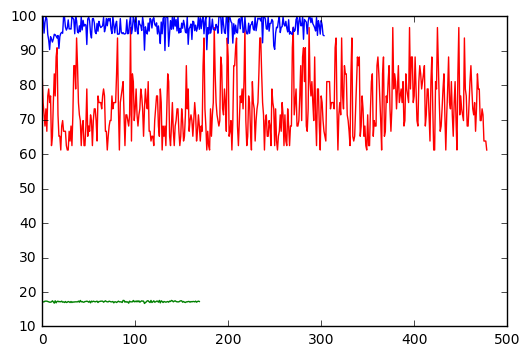

In [105]:
x_range = [i for i in range(len(HR_range))]
plt.plot(x_range, HR_range, 'r')

x_range = [i for i in range(len(R_array)-1)]
plt.plot(x_range, R_array[1:], 'g')

x_range = [i for i in range(len(spo2_range))]
plt.plot(x_range, spo2_range, 'b')

plt.show()